# EE-451 - Image analysis and pattern recognition – Prof. Jean-Philippe Thiran
# Spring 2022
# List of questions for the interviews
# written by: Mehrdad Kiani Oshtorjani

---
# Part 1 – long answers
---

# 1. Present how to perform geometrical transformations of a digital image? Take the example of a translation of a non-integer number of pixels.


The answer is in slide 12 of Lecture 1.

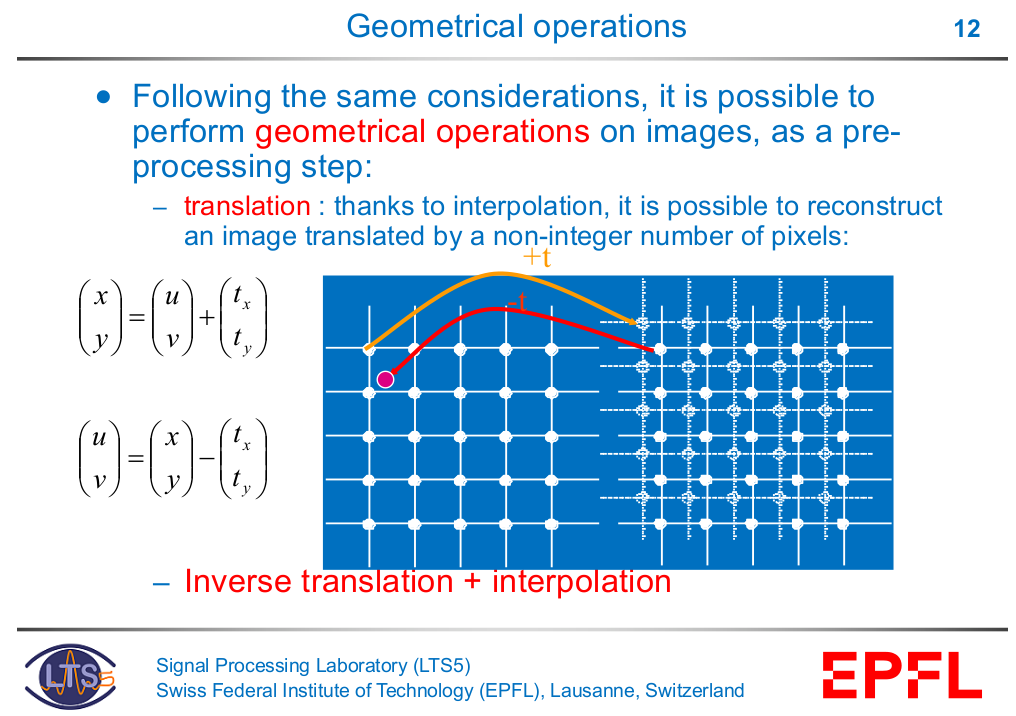

Or we can take the screen and move it by 1.3 pixles which does not seems interesting way OR
We calculate what is the picture that I have to display on the grid of the screen.

So basically we have the original image on the left side and you know that in aanalog world this pixle will transfer there where the yellow arrow is showing, but we do not care since that pixle does not exist. 
THE question is that what is the value of the pixles of the final image? and the only way, if we do inverse transformation whch will tell us where the pixel on the screen comes here where the red arrow is showing and then it is a simple interpolation.

The lazy way, is to average of the pixles around by our choise.

And the calcuate interpolate value back to the pixle on the screen.

Finally: when we do a geometrtical tranformatio, you have to calculate the inverse transformation and guess the values of the pixles in the original image corresponding to the inverse transformation of the pixles that we want to calculate.

Rotaion is same:

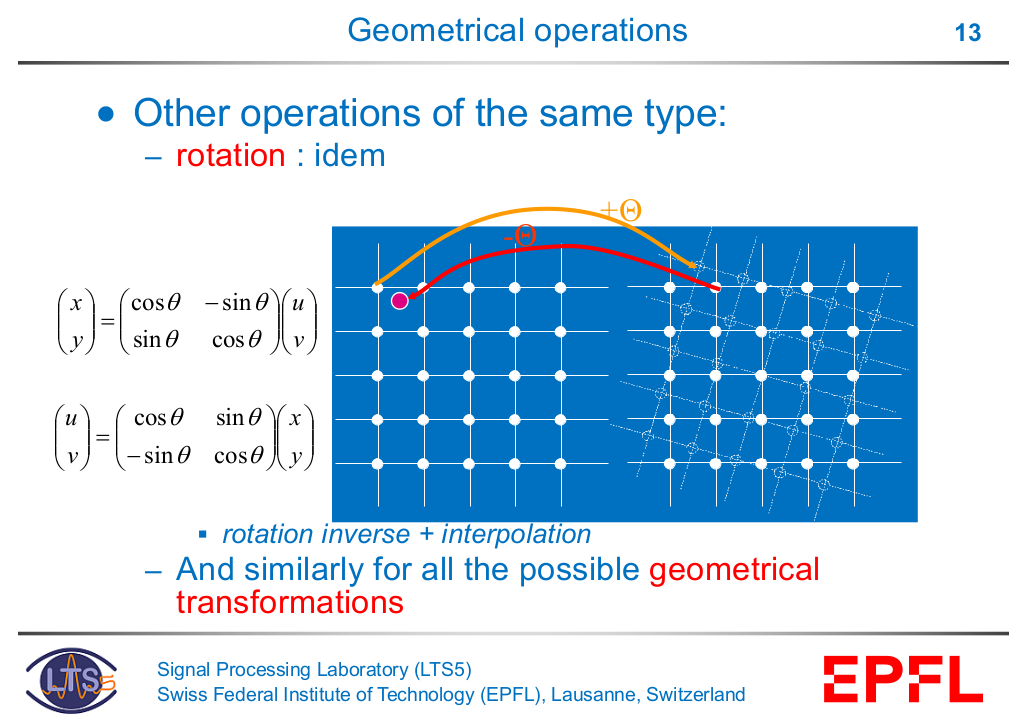

Concultion: always work with inverse geometrical transformation and it is possible to estimate te inverse tranformation is a second order polynomilar of the original coordinate.

# 2. What is image restoration? On this context what is inverse filtering and what is a Wiener filter?

The answer is in slide 36 of Lecture 1.

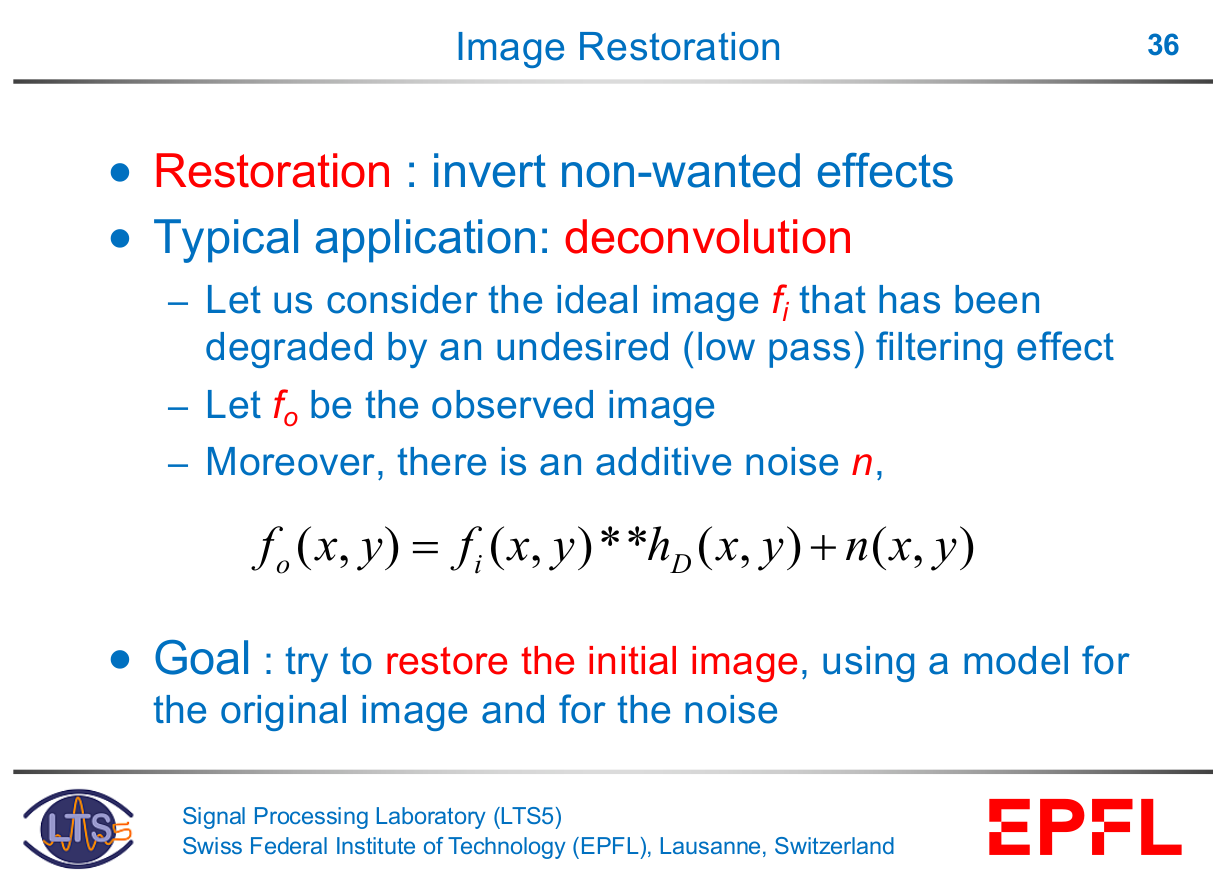

Restoration means inverting the non wanted effects.

Goal: restore the idea (initial) image.

When do we want to use high-pass filter? 

When we do not have too much noise. If we have it is better to cut those high frequencies. So what woule be an ideal system for doing restoration?

An ideal system would recieve an image, calculate its spectrum, try to calculate the spectrum of the noise, looking at the the spectrum of the image and the noise, and for each frequency decide if we have more noise than image information it should have a filter that put the values down and for a given frequncy if the information in the image is higher than power of the noise in that frequency we have to have high pass filter.

$f_o$ : image that is observed 

$f_i$ : image that we like to restore (ideal image)

$h_D$ : degradation filter (the filter that system applied and we do not want, it is a low pass filter which the system applied on the data like shaking the hand while photography)

$n$ : noise 

$f_o = f_i**h_D + n$


If we consider h_R as restoration filter then we are looking for a filter that if we apply on the observed image it would be the idea image: $f_i = f_o **h_R$

By using the forueir transfor of the above equation we can have:

$F_i = [F_i H_D+N]H_R$ which $F_i$ is spectrum of the ideal image, $H_D$ is frequency response of the degradation filter, $N$ is spectrum of the noise and $H_R$ is the frequency response of the restoration affect.

First candidate for solution of $H_R$? inverse of $H_D$ and it is called the inverse filter! But **it is a good idea if the data is very clean** because by doing $N/H_D$ we are doing filtering by a high-pass filter so we are boosting the high frequency of the noise as one can see in the formula below:

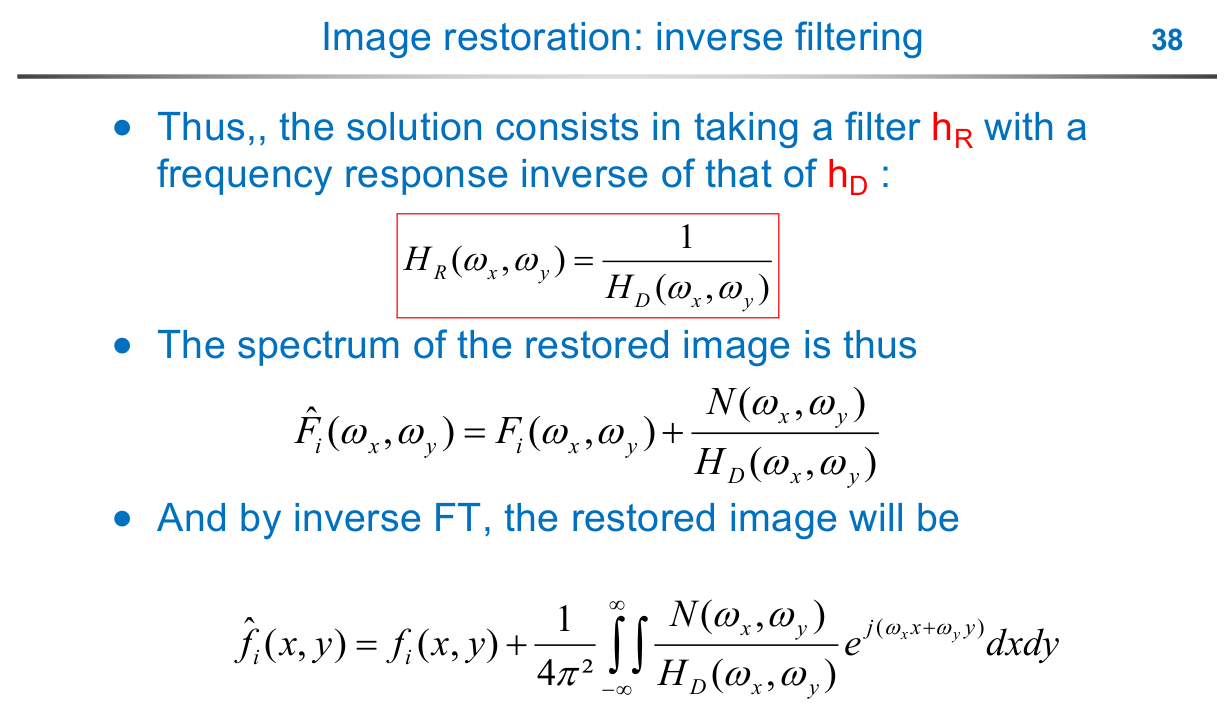

IF WE CAN NOT IGNORE THE NOISE, WHAT THEN? we have to use of Wiener filter.

Wiener filter hypothesis: Images are 2D random variables, with zero mean.

Goal: find a filter $h_R$ that minimize the error: $\epsilon=E\{[f_i(x,y)-\hat f_i(x,y)]^2\}$.

After calculation: $H_R = P_{f_if_o}/P_{f_o}$ where $P_{f_if_o}$ would be the power interspectrum and $P_{f_o}$ is the power spectrum of $f_o$.

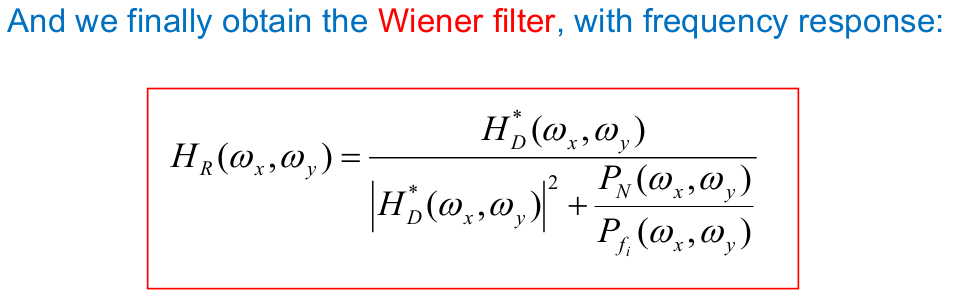

NOTES:

1. If we do not have noise? $P_N$ would be zero then $H_R=1/H_D$, we got back to the inverse filter.
2. If we do have noise? the noise is become big in the denominator and push the value of the filter down to zero.
3. For each frequency, we calcuate the ratio between power of the nosie and power of the image, if the ratio is high (having lots of noise) the filter should push that frequency out. If we have more image information than noise (high ratio of $P_N/P_{f_i}$), we should just do the inverse filter.

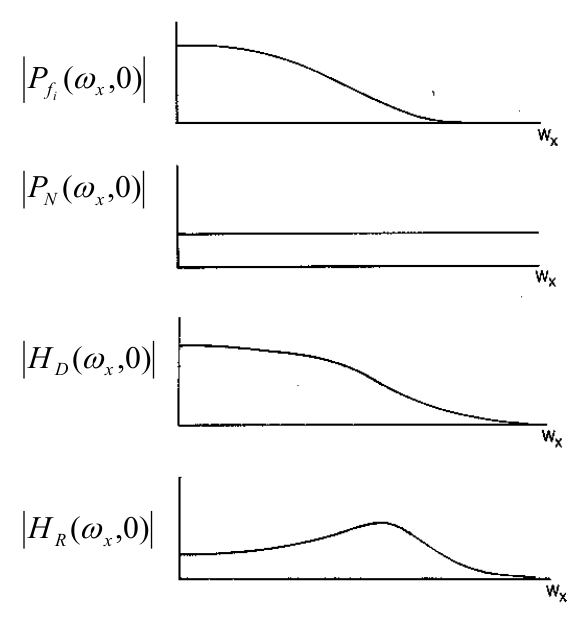

How we can estimate the noise in an image? Just take uniform regions in the image and that's we will see the noise.
Taking an area in the image and do estimate the noise in that area.

How we can estimate $H_D$? By estimating the impulse response. Remeber the calibrating example of telescopes. 

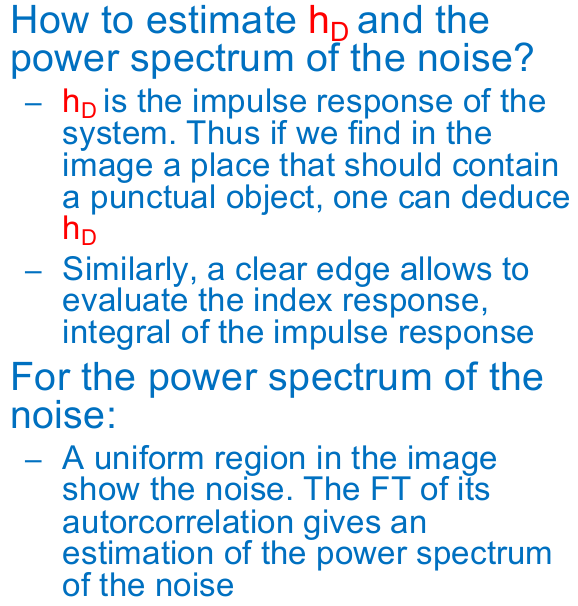

# 3. Explain what object labeling is and the algorithm to implement it.

The answer is in slide 13 of Lecture 2.

It is based on region growing method: 

Region growing: is an iterative method used to extract similar parts of an image. One or several
points are chosen as a start. The region then grows until it is finally blocked by the stop criteria.

The chosen criteria:

– It may be a difference between the outside pixel's intensity value and the region's mean.

– The pixel with minimum intensity in the region neighbourhood is chosen to be included.

– The growing stops as soon as the difference is larger than a threshold.

– The local variance is lower than a threshold (homogeneous texture)

Principe of region growing:

– Let us fix a starting point (seed) in the desired region

– Let us also define the homogeneity criterion used to define the region § e.g. intensity > threshold

– By a recursive procedure, (i.e. neighbor to neighbor), let us include in the region all the pixels that are neighbors of the current pixel and that satisfy the homogeneity criterion § By this the region will grow until it contains all the points connected to the seed point § We obtain a connex region


By using this blackbox tool i.e., given the cooridinate of a seed and the toolbox give the object. We can use this tool to count and lable the objects like below:
 

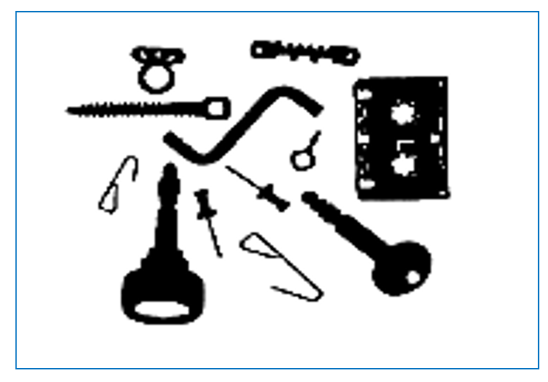

#####################################################################################################################

**Algorithm**: Now suppose we are given a binary image, in order to do object labeling we have to give an input seed to
our function, which goes through the images starting from [x, y] = [0, 0] position, when we encounter a
certain pixel below the threshold given we perform a region growing and we label each object (group
of pixels).

# 4. What are the main principles of edge detection, and the two main families of methods to do edge detection? Present typical methods for each family.


The asnwer is in slide 20 of Lecture 2.

Given a direction in the image, the gray level is plotted above.

The first derivative is the second and second derivative of the gray level is ploted in the lowest.

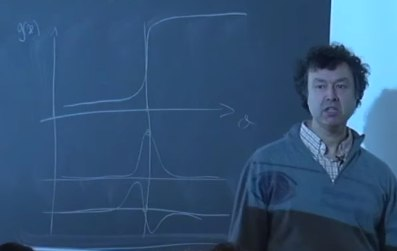

All the existing method for the edge detection try to estimate the maximum of the first derivative or zero of the second derivative.

In order to do edge detection, the goal is to measure the edge sheerness, and the methods used can
be divided into 3 main categories:

  1. Operators approximating derivatives of the image function using differences. Some are rotationally invariant (eg. Laplacian) and thus are computed from convolution masks. Others approximate the first derivative (they try to maximize the first derivative) like:

   
**Robert Operator**: is very easy to compute as it uses only 2X2 neighborhood of the current pixel.
    It masks are :
    
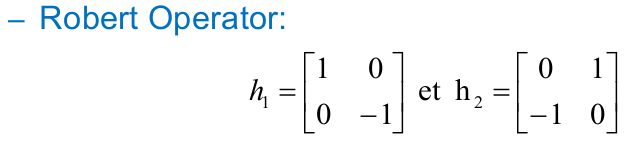
        
Its disadvantage is that it is very sensitive to noise because a very few pixels are used to
    calculate the gradient.

**Prewitt Operator**: is 3X3 convolution mask, the result of the convolution result the greatest
magnitude indicates the gradient direction. Also, the gradient is estimated by 8 masks possible
direction. The direction of gradient is given the mask which gives maximum response.

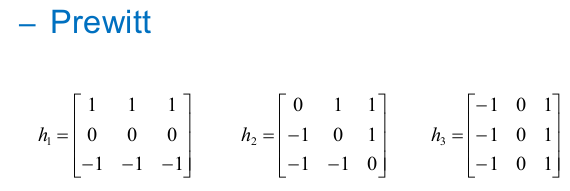
 
This method is more accurate rather than the orevious one since it consider more pixel for calculating the first derivative and if they affected by noise, it cancel the noise more.

2. Marr-Hildreth “ Laplacian of Gaussian “: is a very popular operator approximating the second derivative. 

Idea behind: We know that the first derivative of the image function should have an extreme at the position corresponding to the edge in the image, therefore the second derivative should be zero at that position. So it is much easier and precise to calculate that rather than calculating the maximum. The method is called "Laplacian of Gaussian".

It works as following:

Before calculating the second derivative, this method propose let's filter out the details that we are not interested in. Noise removing by filtering the image with Gaussian filter for example :

$G(x, y) = \exp (-(x^2 + y^2)/ (2 * \sigma^2))$

$\sigma$ (standard deviation) is the only parameter Gaussian smoothing filter, which is
proportional to the size of the neighborhood pixels on which the filter operates. The choosing of $\sigma$ depends on ths user.


Calculate the 2nd derivative of the filtered image : our goal is to calculate now the
second derivative of the image, we know that the Laplacian operator can do that,
which is non-directional (isotropic).

So considering calculating the Laplacian of a smoothed image (by Gaussian Filter),
we get what’s called Laplacian of Gaussian.

Note: in order to calculate that, we can use the property of convolution which is

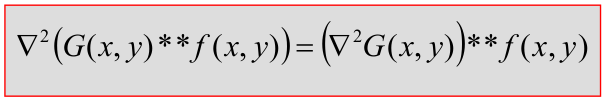

Thus, it means that we just have to convolve the image by the second derivative of a
Gaussian « Laplacian of Gaussian », which can be computed analytically.Therefore,
the edge will be at the zeros.

#### Conclusion: 

#### 1. Beauty number one: Filtering before getting the second derivative to remove the details which are not interesting

#### 2. Beauty number two: The second derivative of a Gaussian has a close form.

# 5. What are the 4 main operators of binary mathematical morphology? Explain each of them.

The idea: To clean isolated holes. 

Four main mathematical morphology are 1. Dilation, 2. Erosion, 3. Opening, and 4. Closing.

**1. Dilation**: In binary images, dilation is an operation that expands the size of foreground objects and
reduces the size of holes in an image

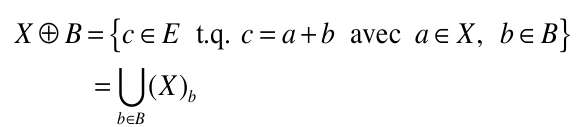

The formula means: I take my object and I do the union of all the translations of that object by the point of the structuring element and it blow the object.

What does it do? Close the holes that are smaller than the structuring element.

**2. Erosion**: is a process that increases the size of background objects and shrinks the foreground
objects in binary images.

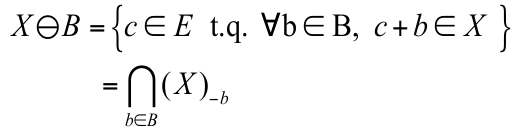

The formula means: The erosion is smaller object such that if we redilate that it is fully included in the original. (The point in in erosion if it dilate by structuring element, all the points are included in the original binary image).

what does it do? It removes everything that is smaller than the structuring element. The kernel slides through the image (as in 2D convolution). A pixel in
the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel
is 1, otherwise it is eroded (made to zero).

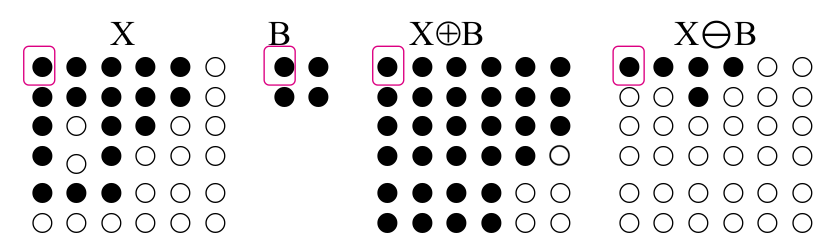

**3. Opening**: 

The two previous operators make the size of image bigger and smaller so if we want to keep the object almost as initial shape, we can do openning and closing.

**Opening** is defined as erosion followed by dilation using the same structuring element for both operations. 

The erosion part removes some foreground pixels from the edges of regions of foreground pixels, while the dilation part adds foreground pixels. 

The foreground features remain roughly the same size, but their contours are smoother.

The effect of opening depends on the shape of the structuring element. Opening preserves foreground regions that have a similar shape to the structuring element.

If the structural element is included in the object at the time of processing than the whole structural element will appear in the output of the transformation, otherwise not all points will appear.

Because, erosion removes white noises, but it also shrinks our object. So we dilate it.
Since noise is gone, they won’t come back, but our object area increases.
Opening tends to smooth an image, break narrow joins, and remove thin protrusions.

**4. Closing**: is defined as the dilation process followed by erosion, opposie of opening, using the same structuring element
for both operations. Closing smoothes the contours of foreground objects, merges narrow breaks or gaps and eliminates small holes.

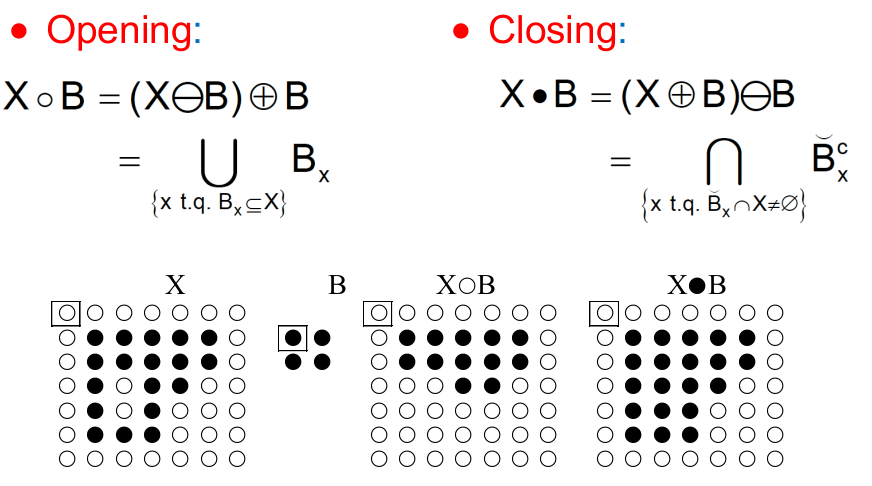

# 6. What are the Fourier descriptors?


Fourier transform is a frequency representation. A signal, can be represent by low + medium + high frequencies. For example, if we just care about the general shape of the signal, we look at the low frequencies. If we want to remove high-frequency noise we easily cut the noise.

Idea of Fourier descriptors: Fourier transform of the contours and decompose it into fundumental frequencies + high frequencies.

Suppose a boundary of a particular shape has $N$ pixels, each has position $(x_k, y_k)$. For each of those points, we define them as complex numbers

$u_k = x_k+jy_k$

1. Then, we calculate the Fourier Transform for the set of points.

2. The $N$ points in the contour, we can get $N$ complex Fourier coefficients.

By using the inverse discrete Fourier transform (DFT), we can recver the original contour.

We will get a set components known as descriptors as a decomposition of the contour as a set of
frequencies (high, and low) where the low-frequencies determine the overall shape and high
frequencies account for fine details about the shape.

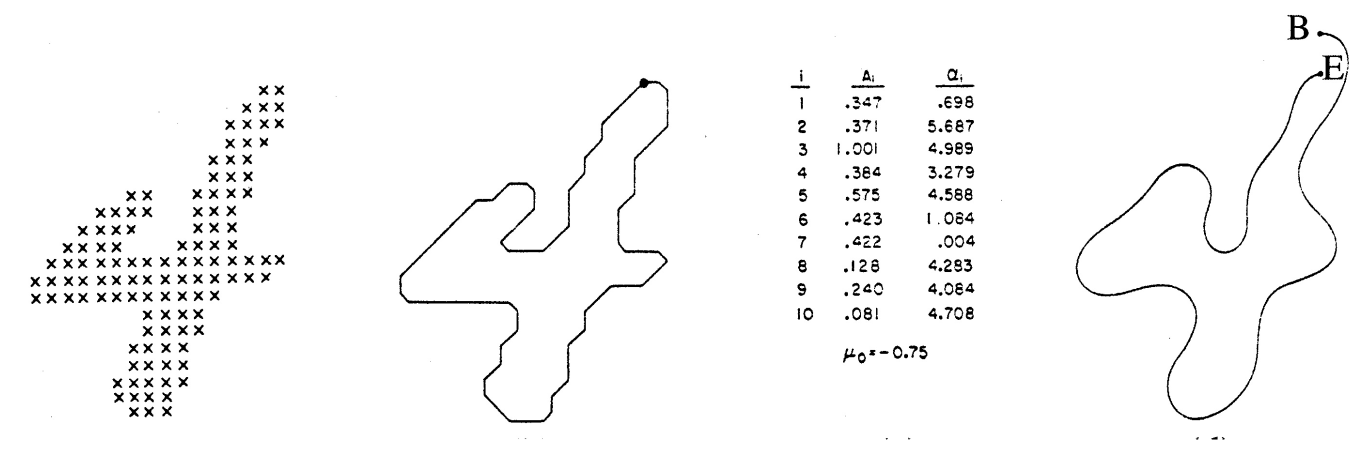

For example, if we have a dataset of wrtten by hand 1,2, and 3, then we calculate contour $u_k$, Fourier tranform and keep first two coefficients then we have:

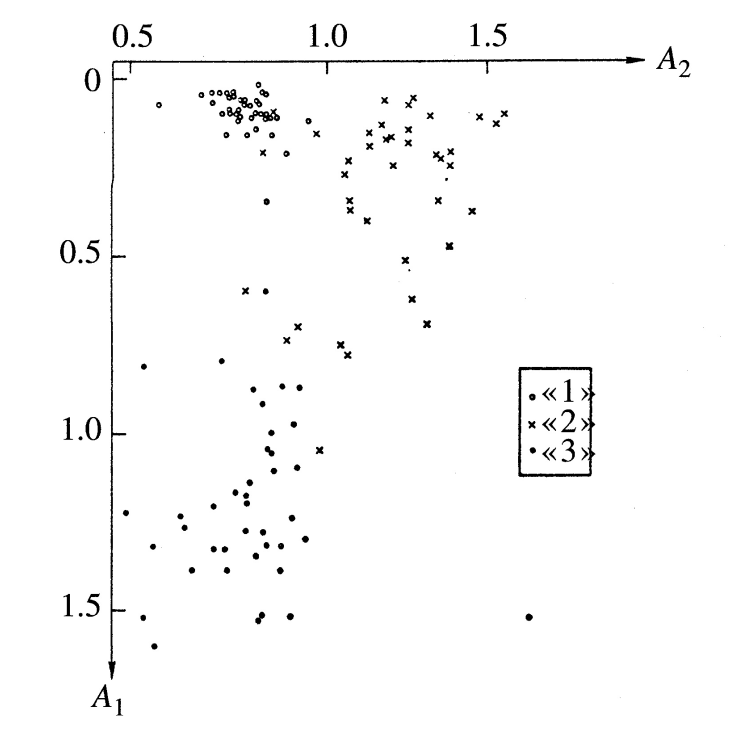

These has the properticies that we were looking for. i.e., 

1. Small intra-class variance

2. Large inter-class variance

3. Small number of features

Effect of translation is the zero coefficient of Fourier transform changes. -> to be invarient : ingnore the zero coefficient.

Effect of rotation changes the phase of all of the coefficient of Fourier transform changes -> to be invarient : ingnore the phase.

Effect of scaling multiply the coefficient of Fourier transform by scale therefore if we consider the ratio of the Foruier tranform we can be invarient to scale.


# 7. What are the Fourier descriptors?


Fourier transform is a frequency representation. A signal, can be represent by low + medium + high frequencies. For example, if we just care about the general shape of the signal, we look at the low frequencies. If we want to remove high-frequency noise we easily cut the noise.

Idea of Fourier descriptors: Fourier transform of the contours and decompose it into fundumental frequencies + high frequencies.

Suppose a boundary of a particular shape has $N$ pixels, each has position $(x_k, y_k)$. For each of those points, we define them as complex numbers

$u_k = x_k+jy_k$

1. Then, we calculate the Fourier Transform for the set of points.

2. The $N$ points in the contour, we can get $N$ complex Fourier coefficients.

By using the inverse discrete Fourier transform (DFT), we can recver the original contour.

We will get a set components known as descriptors as a decomposition of the contour as a set of
frequencies (high, and low) where the low-frequencies determine the overall shape and high
frequencies account for fine details about the shape.

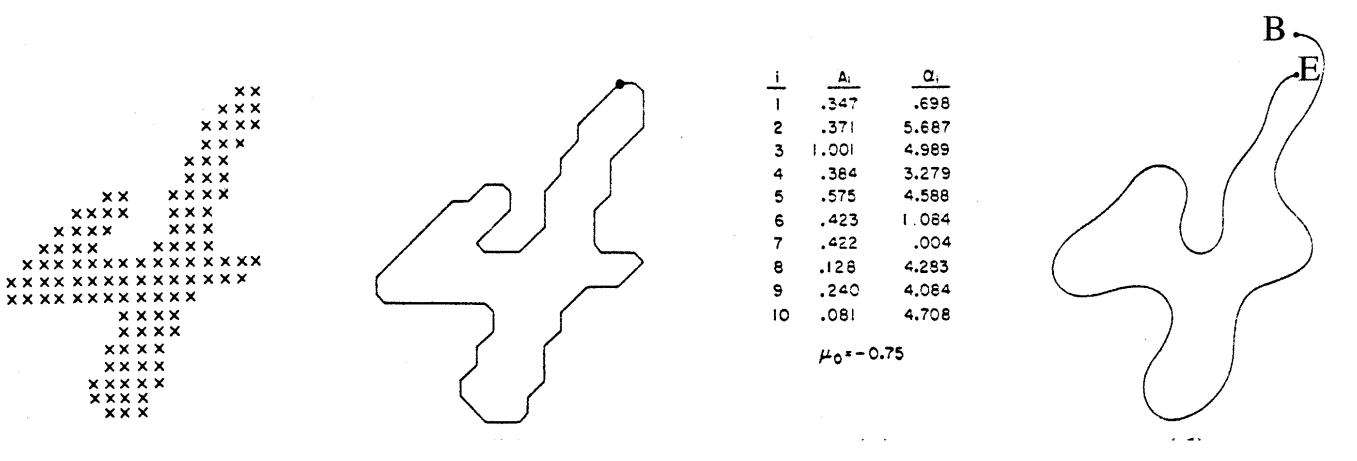

For example, if we have a dataset of wrtten by hand 1,2, and 3, then we calculate contour $u_k$, Fourier tranform and keep first two coefficients then we have:

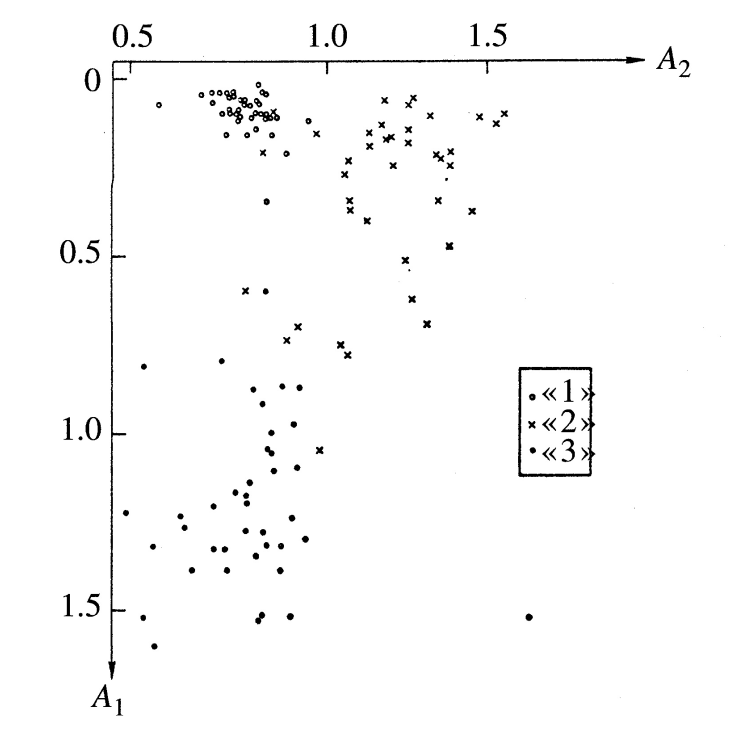

These has the properticies that we were looking for. i.e., 

1. Small intra-class variance

2. Large inter-class variance

3. Small number of features

Effect of translation is the zero coefficient of Fourier transform changes. -> to be invarient : ingnore the zero coefficient.

Effect of rotation changes the phase of all of the coefficient of Fourier transform changes -> to be invarient : ingnore the phase.

Effect of scaling multiply the coefficient of Fourier transform by scale therefore if we consider the ratio of the Foruier tranform we can be invarient to scale.


# 8. What is a Freeman code?


It is also called "chain code", in addition of **"MINIMUM DISTANCE AFTER TRANSFORMATION THAT YOU WANT TO BE INVARIANT OF"**, we have this method to compare two contour in order to know how soimilar they are. 

The idea: To say if I am at a certian point of the countour I will code the position of the next one on the countour. The countour is a string of characters code it from 0 to 7 so we have a very compact representation of the object.

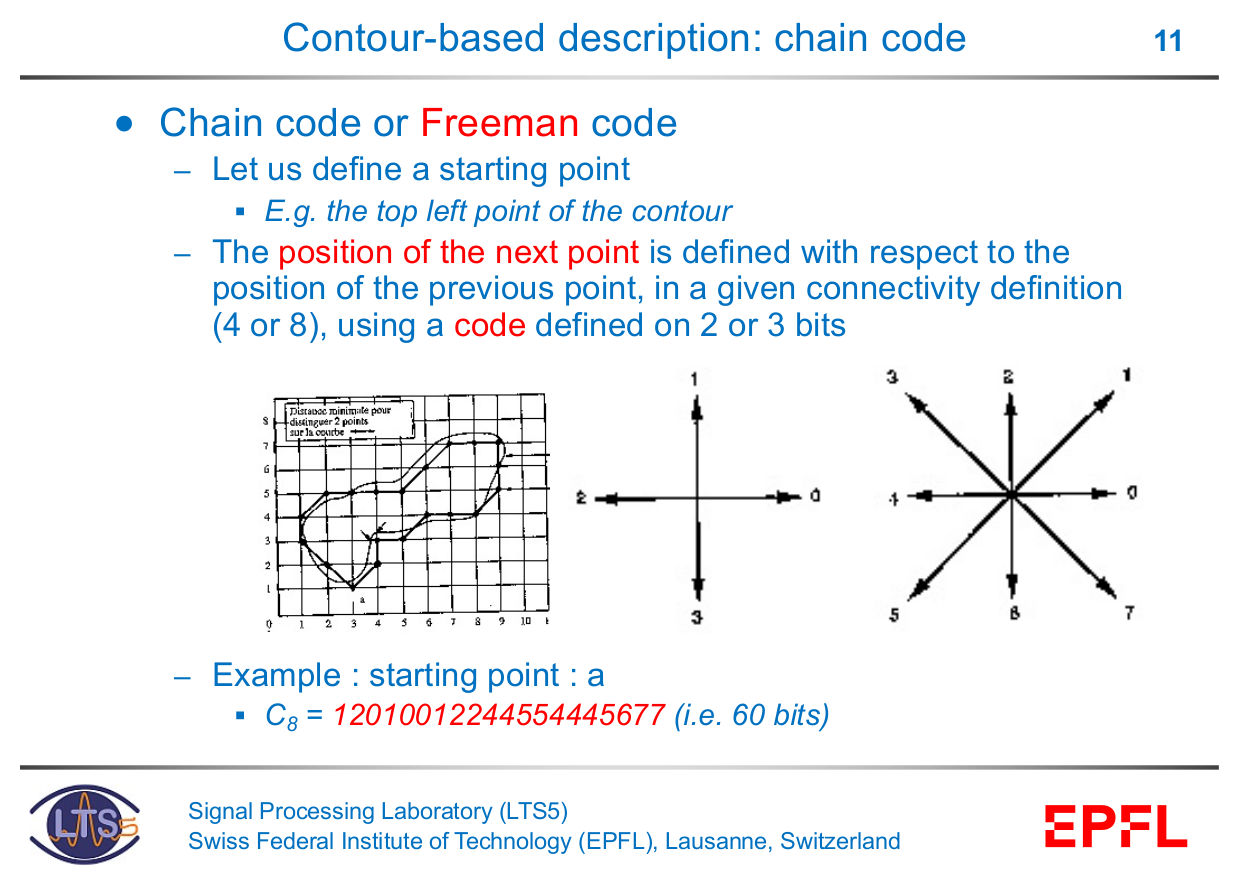



Now, we can use the coded countour to compare them to typical chain of character of different group that we want to know this countour is belongs to.

Similarity of two chain of characters: Similar in terms of converting one to another with smallest number of operations (**MINIMUM NUMBER OF OPERATIONS**).

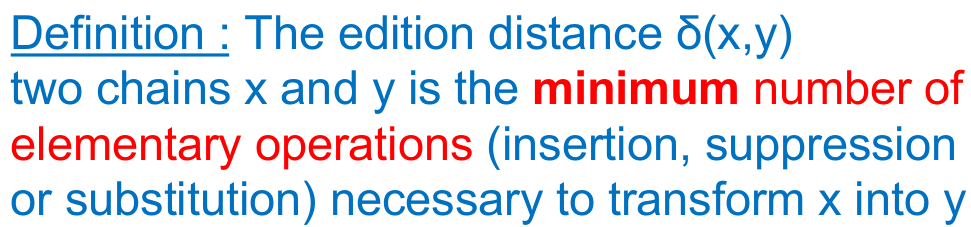

Typical operations: add, remove, substitute

Algorithm to calculate the distance between to chains of characters: Fisher-Wagner

The idea: the number of operations from a very small chain to a very small chain is simple to calculate simpler than the never operation to a bigger chain.
If we have the number of operations to convert small chain to a small chain is easy to calculate an important number of operations I have to do between that small chain and one additional character and the other small chain and one additional character. If we we do it progressively from small to full chain then it would be easy.

HOW?

(what is the number of operation to convert X to Y?)

Three possibility for each element.

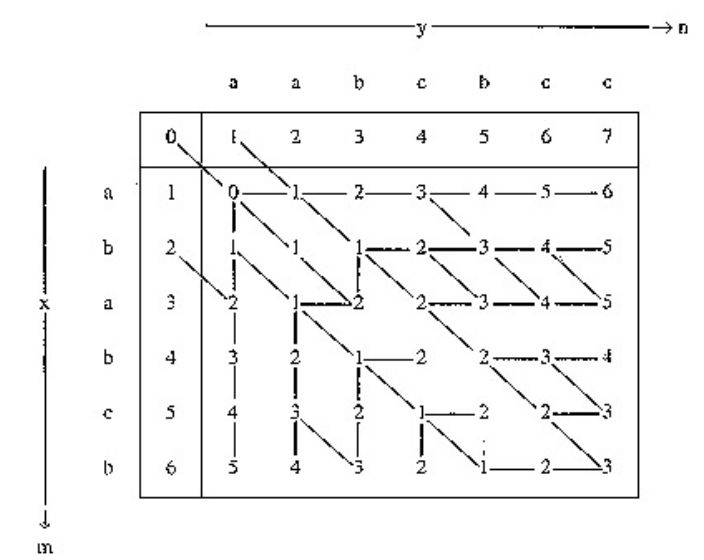


# 9. What is a morphological skeleton?

This is a nice representation of an object.

We can represent an object NOT with its contour but by its medial axis. It works with the main axis and the size of the object around the axis.

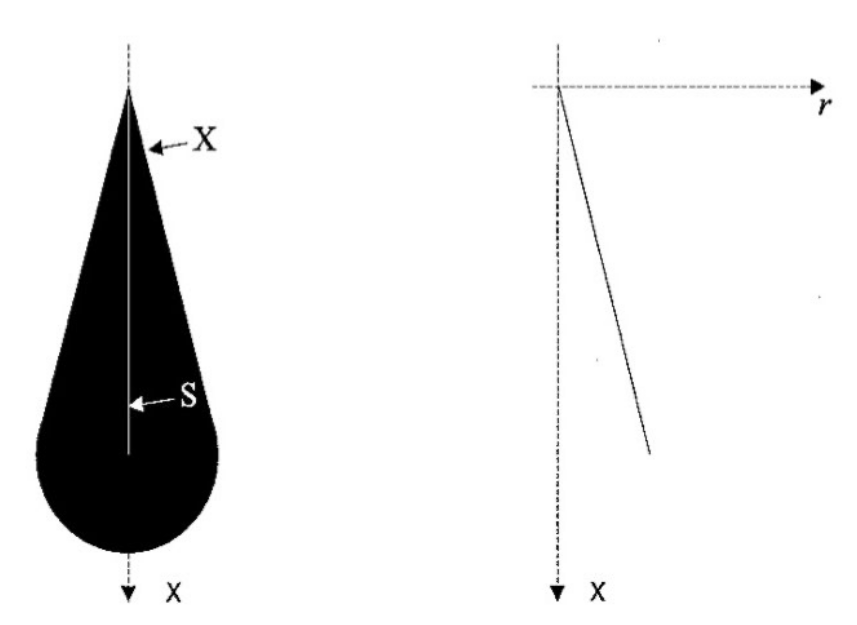

Morphological skeleton is a skeleton (or  medial axis ) representation of a shape or binary image,
computed by means of morphological operators.

The skeleton is useful because it provides a simple and compact representation of a shape that preserves many of the topological and size characteristics of the original shape.

Mathematically, a skeleton can be written as a series of openings and closing.

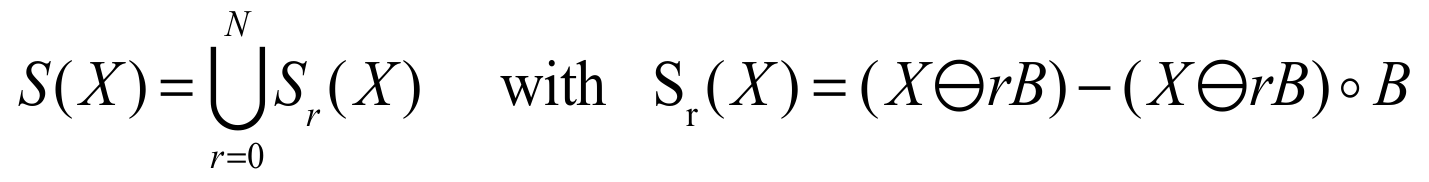


The contribution number 0: $S_0(X)=X-XoB$ where B is small structuring element like very small ball. 

(Reminer: opening remove all the sharp parts that the structuring element soes not fit i.e., the top of the shape).

Therefore $S_0(X)=X-XoB=\text{the top}$ 

The contribution number 1: $S_1(X)=(X \text{erode by} 1*B)-(X \text{erode by}1*B)oB$ where $(X \text{erode by} 1*B)$ is the object with top a bit shrinked and eroded. and $(X \text{erode by}1*B)oB$ is just the new top.

The contribution number 2: Keep going........ 

The skeleton of a shape is the union of small pieces of skeleton.

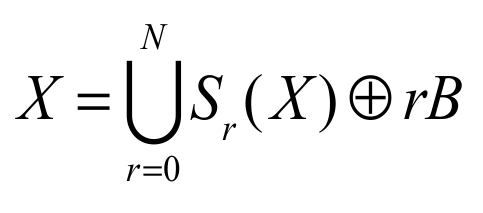

The skeleton with the values of $r$ can invert the shape of the object.

Then for comparing the skeleton, we can remove the small $r$ (narrow parts of the object) and just consider the big $r$ to compare.

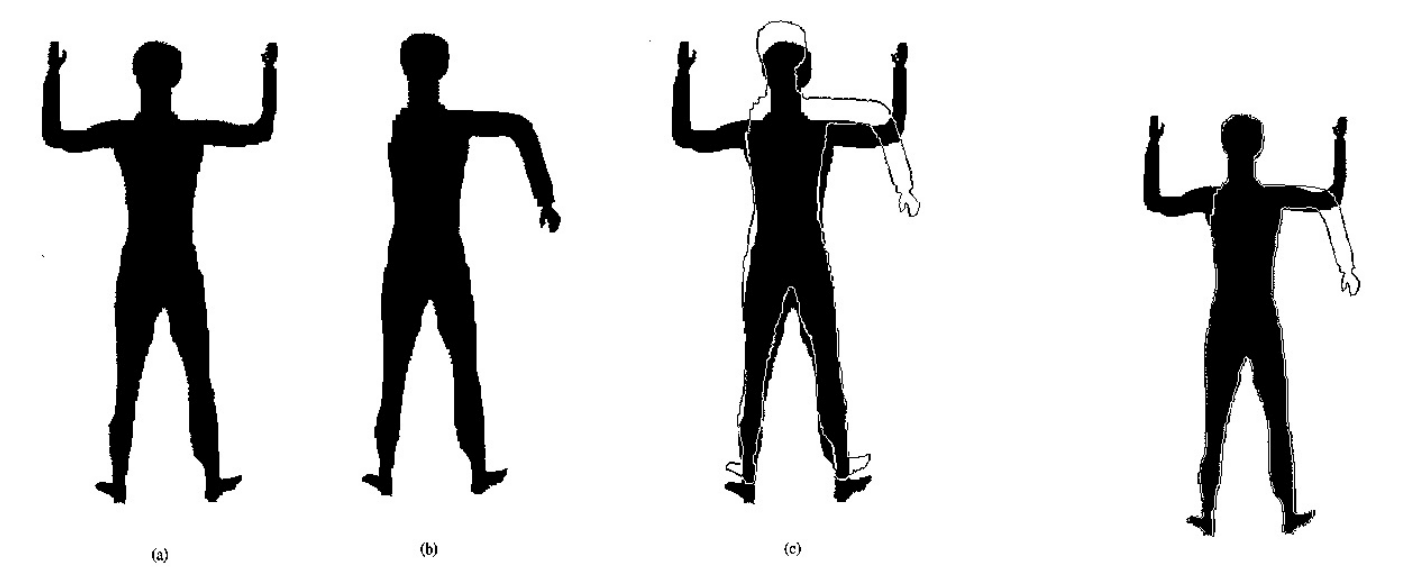

# 10. What is a Bayesian classifier? (principle, advantages & limitations, application to Gaussian cases)

**Principle**:

Feature vectors are assumed to come from a probability distribution function.

We will design a classifier which will assign a feature vector $x$ to the «most probable» class: if $P(w_i|x)>P(w_j|x)$ (if the probabilty of the class knowing the individual is bigger than others) then the feature vector $x$ is belongs to class $i$.

To calcuate $P(w_i|x)$ we can use the Bayes Rules i.e.,

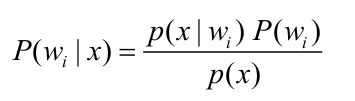

Assuming we have two class problem: we need to calculate the equation of the seperator line which satisfy:

$P(x|w_1)P(w_1)=P(x|w_2)P(w_2)$

The decision surface between class $i$ and $j$ is : $P(w_i|x)=P(w_j|x)$ or $g_i(x)=f(P(w_i|x))$. This equation will be learn by the training dataset.


**Advantages**:

Bayesian technique allows bringing in prior knowledge about the parameter vector.

Best linear classifier in another words it is Tesla of classifiers (assuming the hypothesis that distribution is indeed Gaussian).

Taking advantage of Gaussian Probability : because the sum of independent Gaussian random variables is Guassian.


**Limitations**:

It depends really on whether our hypothesis about the dataset is Guassian indeed or not. 

Assumption that class-specific feature distribution does not depend on sample a different class. 

Overlapping class-specific feature distribution. The features are not perfectly discriminative. Solution: find better features that are more powerful. 

Estimation error: This error occurs because there are too few samples to the number of parameters to give a suitable estimation. Solution : can be diminished by gathering more samples, or reducing the number of parameters.

**Application to Gaussian case**:

We want to estimate $P(x|w_1)P(w_1)$ the prior probability $P(w_1)$ can be estimate by apperance of the training set (but it should be random sampling) that the proportion it is a good estimates of prior probabilty. If we choose $f$ as a log function in $g_i(x)=f(P(w_i|x))$ therefore we have:

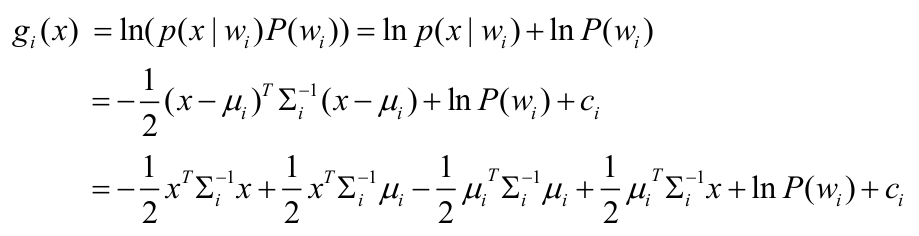

This decision function $g_{ij}=g_i(x)-g_j(x)=0$ is quadric.



**Case I** : The covariance is equal for all classes: $\sum_i=\sum$

Then the quadratic become linear (the frst term in the picture removed).

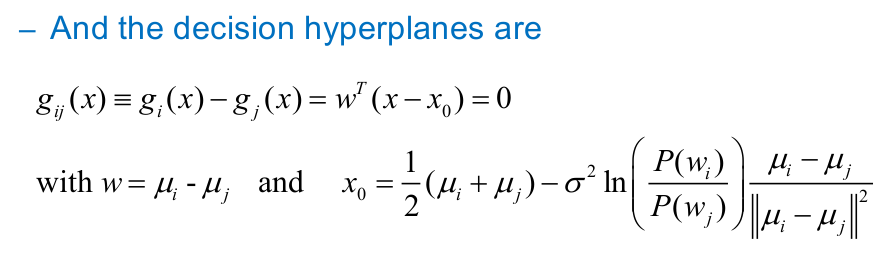

and more special case is when $\sum$ diagonal with equal values $\sum=\sigma^2 I$.

therefore under hypothesis: 

   Gaussian distributions, 
    
   with the same covariance, 
    
   this covariance is a bit bering especial and 
    
   two classes have the same prior probability the linear line is the best classifier in the world!
 
If the priors are not the same then the decision line will move away from the most probable, which make sense.


If the covariance is not diagonal (isotropic) the decision function is line again but it is tilted in comparison of perpendicular line.



# 11. What is a Bayesian classifier? (principle, advantages & limitations, application to Gaussian cases)

**Principle**:

Feature vectors are assumed to come from a probability distribution function.

We will design a classifier which will assign a feature vector $x$ to the «most probable» class: if $P(w_i|x)>P(w_j|x)$ (if the probabilty of the class knowing the individual is bigger than others) then the feature vector $x$ is belongs to class $i$.

To calcuate $P(w_i|x)$ we can use the Bayes Rules i.e.,

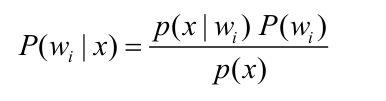

Assuming we have two class problem: we need to calculate the equation of the seperator line which satisfy:

$P(x|w_1)P(w_1)=P(x|w_2)P(w_2)$

The decision surface between class $i$ and $j$ is : $P(w_i|x)=P(w_j|x)$ or $g_i(x)=f(P(w_i|x))$. This equation will be learn by the training dataset.


**Advantages**:

Bayesian technique allows bringing in prior knowledge about the parameter vector.

Best linear classifier in another words it is Tesla of classifiers (assuming the hypothesis that distribution is indeed Gaussian).

Taking advantage of Gaussian Probability : because the sum of independent Gaussian random variables is Guassian.


**Limitations**:

It depends really on whether our hypothesis about the dataset is Guassian indeed or not. 

Assumption that class-specific feature distribution does not depend on sample a different class. 

Overlapping class-specific feature distribution. The features are not perfectly discriminative. Solution: find better features that are more powerful. 

Estimation error: This error occurs because there are too few samples to the number of parameters to give a suitable estimation. Solution : can be diminished by gathering more samples, or reducing the number of parameters.

**Application to Gaussian case**:

We want to estimate $P(x|w_1)P(w_1)$ the prior probability $P(w_1)$ can be estimate by apperance of the training set (but it should be random sampling) that the proportion it is a good estimates of prior probabilty. If we choose $f$ as a log function in $g_i(x)=f(P(w_i|x))$ therefore we have:


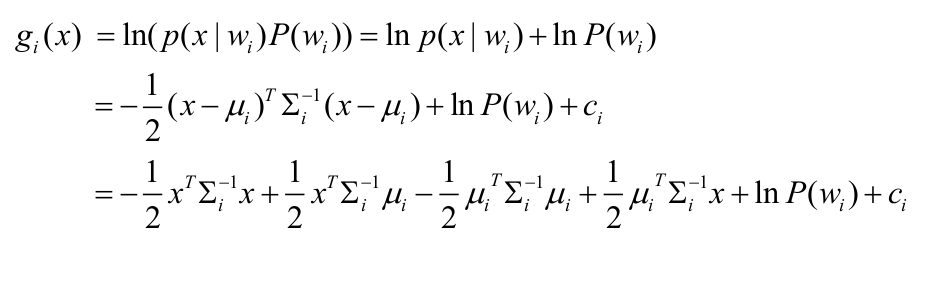

This decision function $g_{ij}=g_i(x)-g_j(x)=0$ is quadric.



**Case I** : The covariance is equal for all classes: $\sum_i=\sum$

Then the quadratic become linear (the frst term in the picture removed).


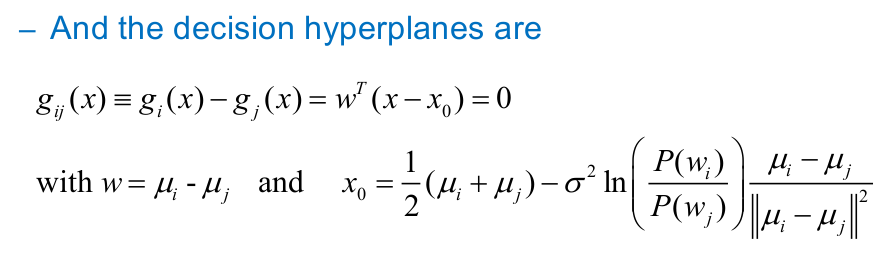

and more special case is when $\sum$ diagonal with equal values $\sum=\sigma^2 I$.

therefore under hypothesis: 

   Gaussian distributions, 
    
   with the same covariance, 
    
   this covariance is a bit bering especial and 
    
   two classes have the same prior probability the linear line is the best classifier in the world!
 
If the priors are not the same then the decision line will move away from the most probable, which make sense.


If the covariance is not diagonal (isotropic) the decision function is line again but it is tilted in comparison of perpendicular line.



---
# Part 2 – short answers
---

# 1. What is a Median filter?

The asnwer is in slide 29 of Lecture 1.

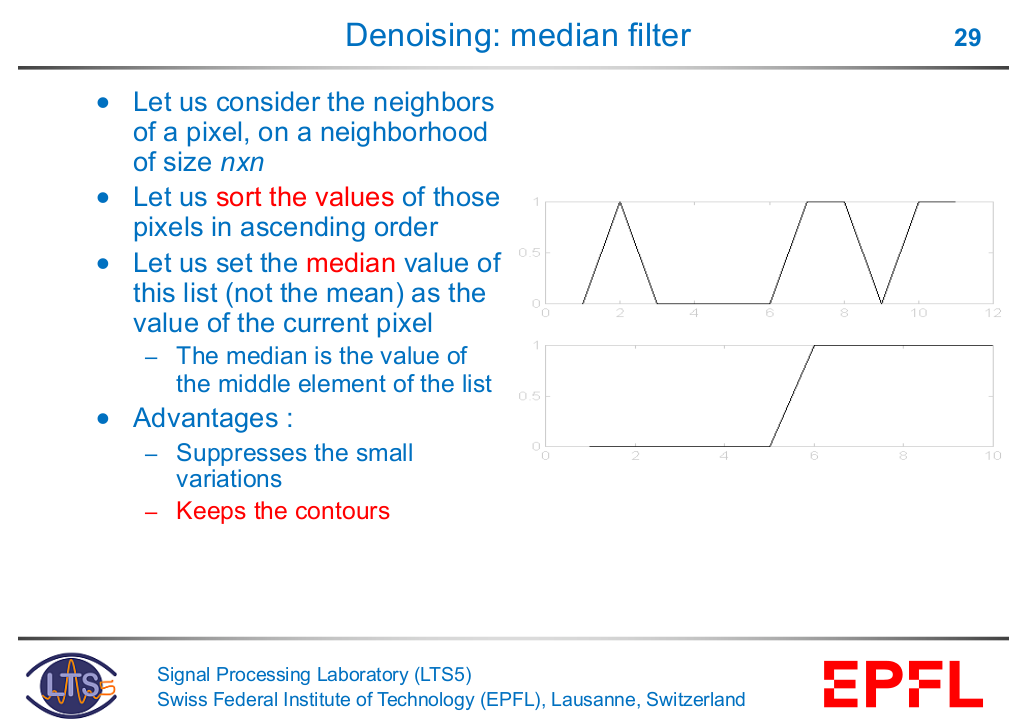

It is a a nonlinear filter so a bit and just a bit more comlicated than just applying a convolution (weighted sum of the neighbors of the pixles).

Assume we have a 1d signal such as the one shown above the slide.

First we choose the size of kernel in 1d like 3 pixles. It means for each pixle we consider we look at the pxiels and two neighbors. We look at their values, three of them, and we sort them (smallest to lergest) and the median of the list is tha value in the miidle of the list. 

IT IS NOT THE MEAN.

For example: Considet the second value on the original signal then by considering a kernel of size 3, we have : [0 1 0] and by sorting them we have [0 0 1] and therefore the median is 0.

What does it do? It replace he values of a pixel by he median of the pixle in its neighbors that means it will remove the outliers (all the things that do not stay for a long neighborhood). A white pixel between some black pixles will be removed but the mean does not remove the white pixel.

This filter is so useful when we have salt & pepper noise.


With the median filter we do not the countours and edges and they remain sharp (but the mean filters was not like this and the images was blur after filtering).

Colcution: This fikter preserve the contours and remove all the pixles that really clear outliers.

# 2. What is a Median filter?

The asnwer is in slide 29 of Lecture 1.

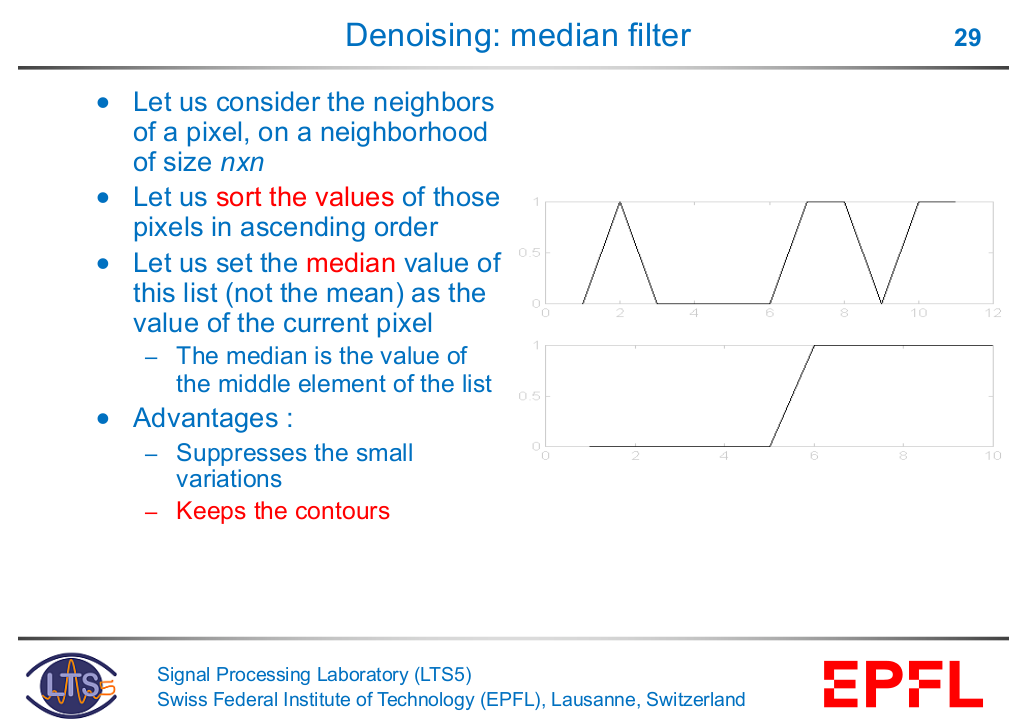

It is a a nonlinear filter so a bit and just a bit more comlicated than just applying a convolution (weighted sum of the neighbors of the pixles).

Assume we have a 1d signal such as the one shown above the slide.

First we choose the size of kernel in 1d like 3 pixles. It means for each pixle we consider we look at the pxiels and two neighbors. We look at their values, three of them, and we sort them (smallest to lergest) and the median of the list is tha value in the miidle of the list. 

IT IS NOT THE MEAN.

For example: Considet the second value on the original signal then by considering a kernel of size 3, we have : [0 1 0] and by sorting them we have [0 0 1] and therefore the median is 0.

What does it do? It replace he values of a pixel by he median of the pixle in its neighbors that means it will remove the outliers (all the things that do not stay for a long neighborhood). A white pixel between some black pixles will be removed but the mean does not remove the white pixel.

This filter is so useful when we have salt & pepper noise.


With the median filter we do not the countours and edges and they remain sharp (but the mean filters was not like this and the images was blur after filtering).

Colcution: This fikter preserve the contours and remove all the pixles that really clear outliers.

# 3. What is the Laplacian of Gaussian (LoG) method for edge detection? (this question cannot be taken if question 4 is taken in Part 1)

Laplacian of Gaussian or LoG is a method for detecting the edges. 

LoG is a very popular operator approximating the second
derivative. 

Idea behind: We know that the first derivative of the image function should have an
extreme at the position corresponding to the edge in the image, therefore the second
derivative should be zero at that position. So it is much easier and precise to calculate that
rather than calculating the maximum.

It works as following:

Before calculating the second derivative, this method propose let's filter out the details that we are not interested in. Noise removing by filtering the image with Gaussian filter for example :

$G(x, y) = \exp (-(x^2 + y^2)/ (2 * \sigma^2))$

$\sigma$ (standard deviation) is the only parameter Gaussian smoothing filter, which is
proportional to the size of the neighborhood pixels on which the filter operates. The choosing of $\sigma$ depends on ths user.


Calculate the 2nd derivative of the filtered image : our goal is to calculate now the
second derivative of the image, we know that the Laplacian operator can do that,
which is non-directional (isotropic).

So considering calculating the Laplacian of a smoothed image (by Gaussian Filter),
we get what’s called Laplacian of Gaussian.

Note: in order to calculate that, we can use the property of convolution which is

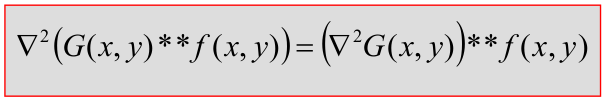

Thus, it means that we just have to convolve the image by the second derivative of a
Gaussian « Laplacian of Gaussian », which can be computed analytically.Therefore,
the edge will be at the zeros.

#### Conclusion: 

#### 1. Beauty number one: Filtering before getting the second derivative to remove the details which are not interesting

#### 2. Beauty number two: The second derivative of a Gaussian has a close form.

# 4. How do we calculate the axes of inertia of a binary object?


Axes of inertia: an system of axes that minimizes the variance of the shape projected on the axes. In another words, the axis around which it rotates with minimum moments. The axis that mass is equlibrating around it.

what is $u$ (axis of inertia) that minimize:

$V$ is the variance of a shape $S$,

$x$: each point of object,

$\bar x$: center of the object.

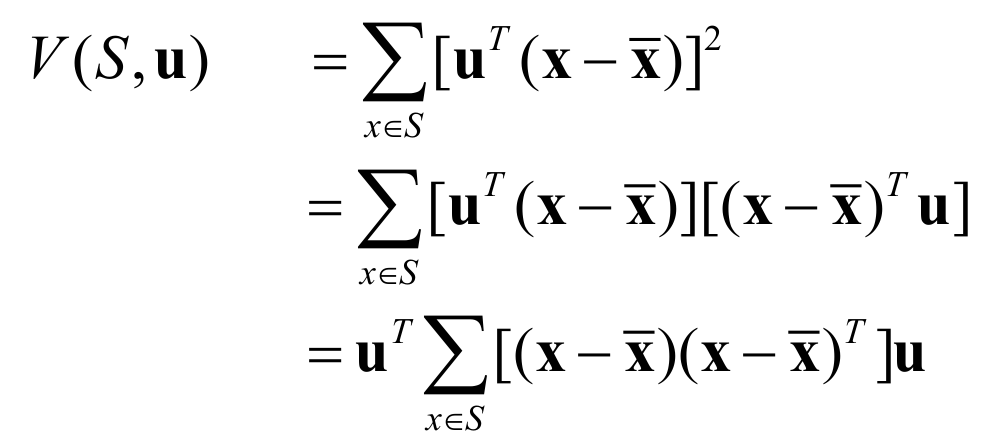

and at the end it gives us 2x2 matrix because our object is 2D.

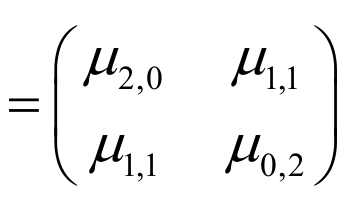

The matrix called "covariance matrix", and the elements $(1,1)$, and $(2,2)$ are the moments.

So what is the $u$ to minimize the $V(S,u)=u^T T u$, it is eigen vectors of $T$. The one that corresponds to highest eig values is the main axis and another one gives the width the object. and also the angle of the object is given by values of the covariance matrix as well.

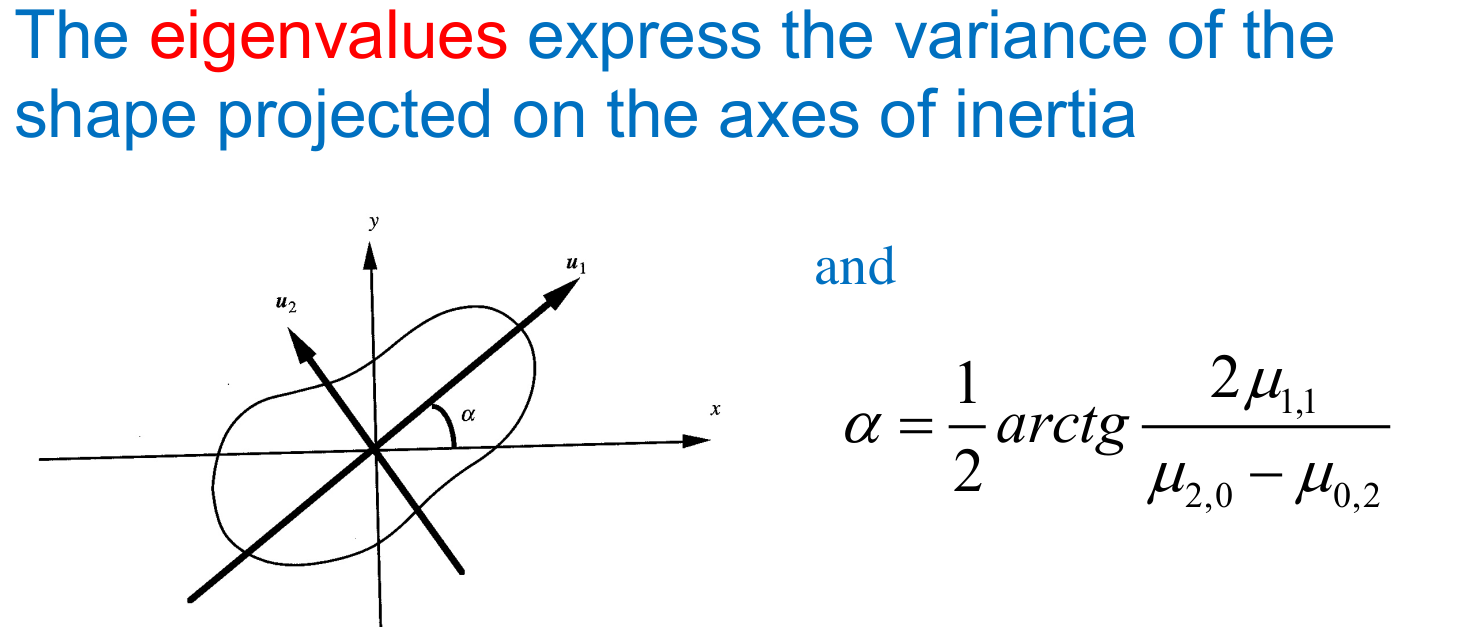

# 5. What is an Euclidean distance classifier?


We can do distance based classification based on Euclidean distance classifier in the very especific case as shown below:

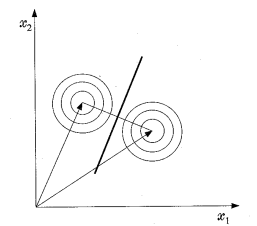


Gaussian distributions, with the same covariance, this covariance is a bit being especial by being diagonal and two classes have the same prior probability

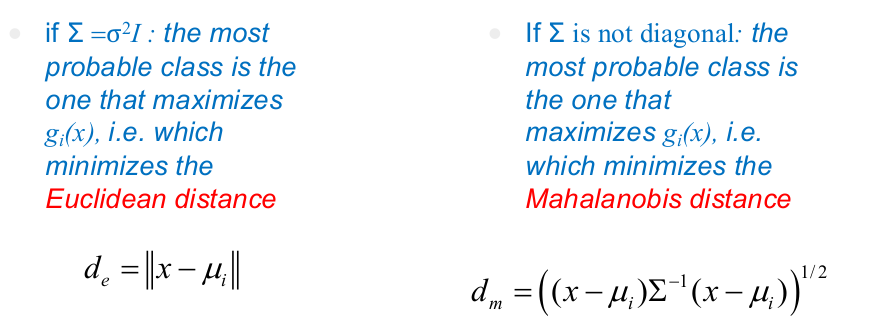

# 6. What is a Mahalanobis distance classifier?

We can still clasify by the distance between two centers in the case when the covariance is not diagonal just we need to modify the distance as below:

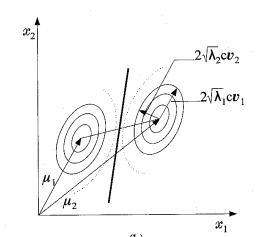

Gaussian distributions, with the same covariance, and two classes have the same prior probability

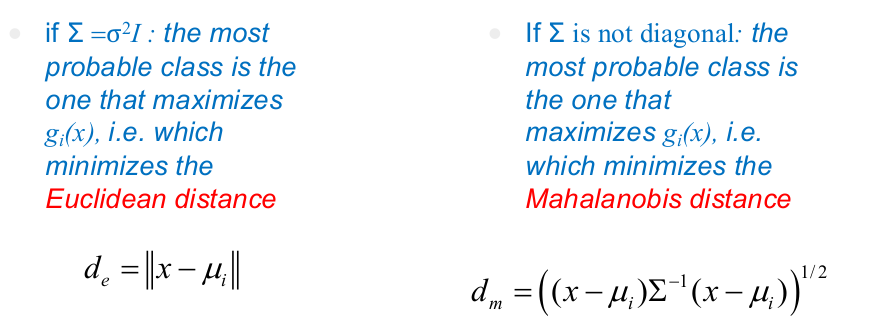

# 7. What is a k-NN classifier?


KNN means K nearest neighbors and classifying a new point by the KNN, algorithm is just we take the point where it is in the feature space and we look at the K nearest neighbors (we look in the training set and the K for example 5 so we take 5 nearest neighbors) and we know for each K point the correct classification because they are in the train set. we just look among those five what is the class that is most represented if in that K points the majority is class 1 for example then the new point is belong to class 1 too.

Advantages : 

   We do not have any assumptions on  the distributions.
   
   It gives a very good performances.
   
Disadvantages:

   time consuming because of calculating the K nearest.
   

# 8. What is a linear perceptron and how can we train it?


Assume we want to minimize the error of a line as linear discriminant function. 

Assume for the points in class 1, $w'^Tx>0$ and class 2, $w'^Tx<0$

$(w^\star)^Tx>0, \forall x\in w_1$ 

$(w^\star)^Tx<0, \forall x\in w_2$ 

The error will be a negative value for $(w^\star)^Tx$ when ew know it is belongs to class 1 and a positive value for $(w^\star)^Tx$ when ew know it is belongs to class 2.

Then minimizing the cost function will give us the best $w$ such that we have the smallest negative value for the points of class 1 and positive values for the points of class 2.

We can minimize the cost function by using the gradiant descent.

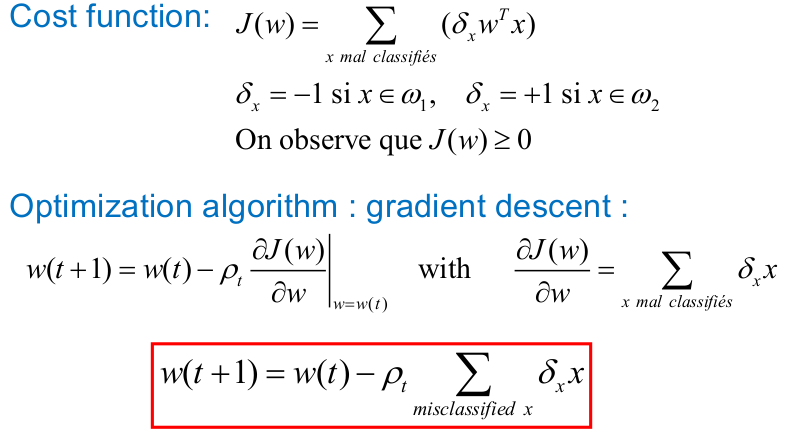


For example:

First line to estimate the wwights:

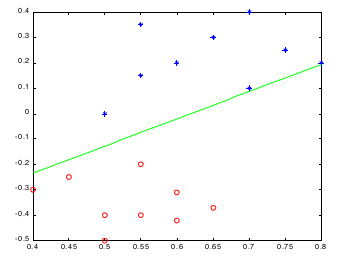

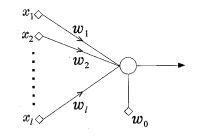


This is a neural and this algorithm does that the linear neural network does which is called a single layer perceptron.

# 9. What is a Multi-layer perceptron?


If we can not classify with a single perceptron such as below, what we can easly do, is to use 2-layer perceptron.

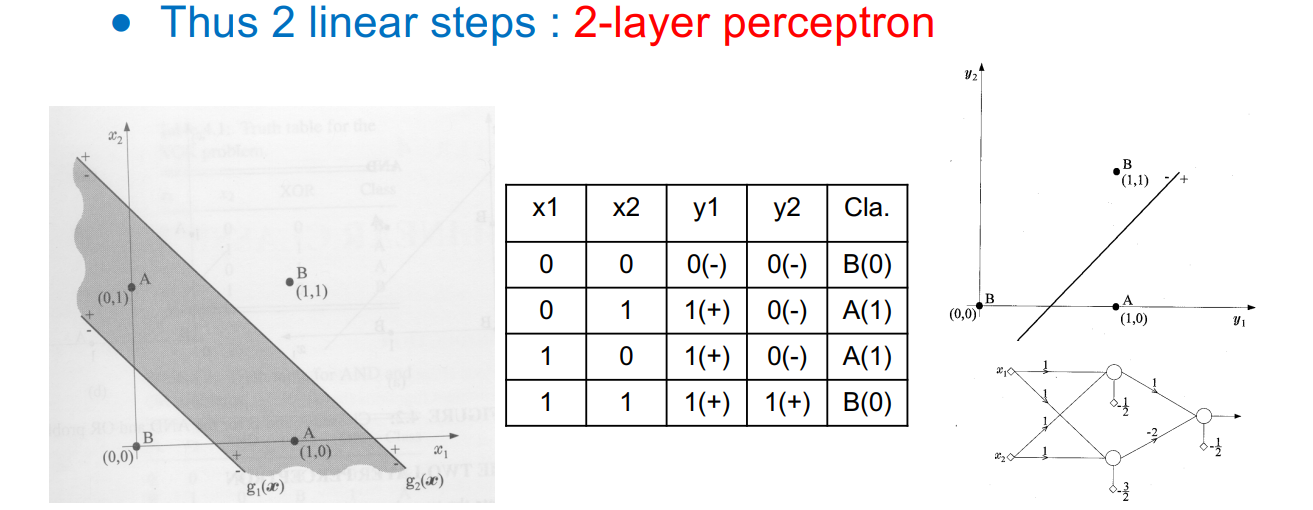

The idea of doing a multi-layer perceptron is to combine linear classification. With a single layer, we do linear classification , combinition of multi single perceptron we can make it more flexiable such as

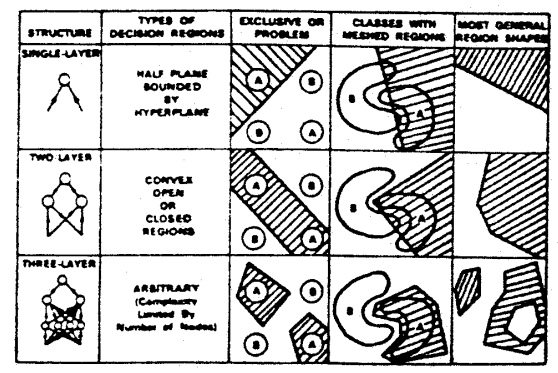

# 10. What is supervised and non-supervised classification?


**Supervised classifiers**:

We have a training set, i.e. a set of feature vectors with their correct class label

We have to build a classifiers that exploits this prior information

Example : Optical Character Recognition

Bayesian Classifiers

Linear Classifiers

Non-linear classifiers – neural networks

**Unsupervised classifiers**: 

We just have a set of feature vectors, without their class label

We have non-classified training samples, we can do an unsupervised training of a classifier.

– The samples live in their feature space

– We try to identify regions of high sample density, which model the sample probability distribution function: approximation by Gaussian laws

– This is called clustering

– We have to group similar vectors to create clusters, and identify those clusters

# 11. What is non-supervised classification and describe the k-means algorithm?

**Unsupervised classifiers**: 

We just have a set of feature vectors, without their class label

We have non-classified training samples, we can do an unsupervised training of a classifier.

– The samples live in their feature space

– We try to identify regions of high sample density, which model the sample probability distribution function: approximation by Gaussian laws

– This is called clustering

– We have to group similar vectors to create clusters, and identify those clusters


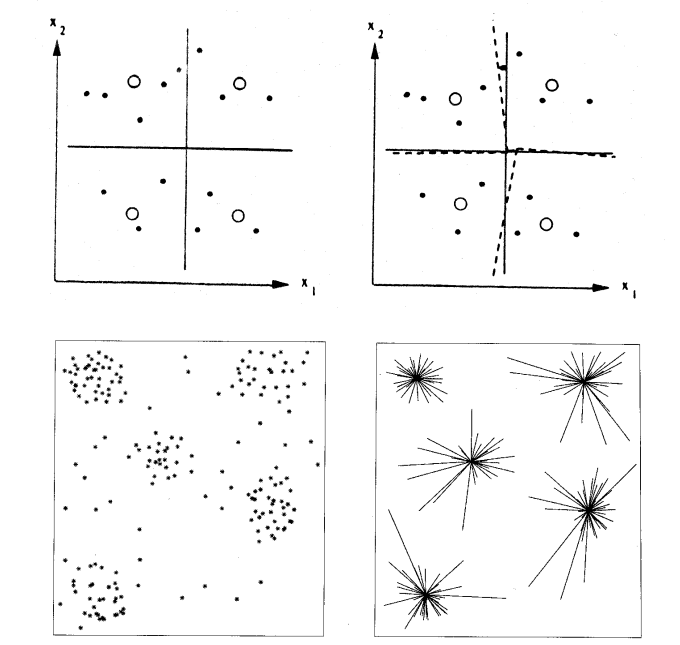

We initialize by four centers: those suppose to be prototype of the four classes the center's. 

The K-means mention that if those four points are the center of the four classes that means that the boundary beteen those fpour classes are the two lines. 

For example, five points are belongs to class 1 and then we update the centers based on the points and so on so for...